## Credit Card Fraud Kaggle Project

Logistic Regression and a random forest model to predict fraudulent transactions on credit card data. 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from geopy.distance import geodesic
import math
import IPython
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [4]:

urls = [
    "https://raw.githubusercontent.com/rokibulroni/Phishing-Email-Dataset/refs/heads/main/CEAS_08.csv",
    "https://raw.githubusercontent.com/rokibulroni/Phishing-Email-Dataset/refs/heads/main/Nazario.csv",
    "https://raw.githubusercontent.com/rokibulroni/Phishing-Email-Dataset/refs/heads/main/Nigerian_Fraud.csv",
    "https://github.com/rokibulroni/Phishing-Email-Dataset/raw/refs/heads/main/SpamAssasin.csv"
]


#df = pd.concat([pd.read_csv(url) for url in urls], ignore_index=True)
df = pd.read_csv("https://github.com/rokibulroni/Phishing-Email-Dataset/raw/refs/heads/main/SpamAssasin.csv")




In [12]:
df

,sender,receiver,date,subject,body,label,urls
0,Robert Elz <kre@munnari.OZ.AU>,Chris Garrigues <cwg-dated-1030377287.06fa6d@D...,"Thu, 22 Aug 2002 18:26:25 +0700",Re: New Sequences Window,"Date: Wed, 21 Aug 2002 10:54:46 -0500 ...",0,1
1,Steve Burt <Steve_Burt@cursor-system.com>,"""'zzzzteana@yahoogroups.com'"" <zzzzteana@yahoo...","Thu, 22 Aug 2002 12:46:18 +0100",[zzzzteana] RE: Alexander,"Martin A posted:\nTassos Papadopoulos, the Gre...",0,1
2,"""Tim Chapman"" <timc@2ubh.com>",zzzzteana <zzzzteana@yahoogroups.com>,"Thu, 22 Aug 2002 13:52:38 +0100",[zzzzteana] Moscow bomber,Man Threatens Explosion In Moscow \n\nThursday...,0,1
3,Monty Solomon <monty@roscom.com>,undisclosed-recipient: ;,"Thu, 22 Aug 2002 09:15:25 -0400",[IRR] Klez: The Virus That Won't Die,Klez: The Virus That Won't Die\n \nAlready the...,0,1
4,Stewart Smith <Stewart.Smith@ee.ed.ac.uk>,zzzzteana@yahoogroups.com,"Thu, 22 Aug 2002 14:38:22 +0100",Re: [zzzzteana] Nothing like mama used to make,"> in adding cream to spaghetti carbonara, whi...",0,1
...,...,...,...,...,...,...,...
5804,Professional_Career_Development_Institute@Frug...,yyyy@netnoteinc.com,"Tue, 3 Dec 2002 13:19:58 -0800",Busy? Home Study Makes Sense!,\n\n \n--- \n![](http://images.pcdi-homestud...,1,1
5805,"""IQ - TBA"" <tba@insiq.us>",<yyyy@spamassassin.taint.org>,"Tue, 3 Dec 2002 18:52:29 -0500",Preferred Non-Smoker Rates for Smokers,This is a multi-part message in MIME format. -...,1,1
5806,Mike <raye@yahoo.lv>,Mailing.List@user2.pro-ns.net,"Sun, 20 Jul 2003 16:19:44 +0800","How to get 10,000 FREE hits per day to any web...","Dear Subscriber,\n\nIf I could show you a way ...",1,1
5807,"""Mr. Clean"" <cweqx@dialix.oz.au>",<Undisclosed.Recipients@webnote.net>,"Wed, 05 Aug 2020 04:01:50 -1900",Cannabis Difference,****Mid-Summer Customer Appreciation SALE!****...,1,0


In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5809 entries, 0 to 5808
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sender    5809 non-null   object
 1   receiver  5599 non-null   object
 2   date      5809 non-null   object
 3   subject   5793 non-null   object
 4   body      5808 non-null   object
 5   label     5809 non-null   int64 
 6   urls      5809 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 317.8+ KB
None


In [14]:
#Value counts show that the data is imbalanced. Which is what would be expected for fraudulent activity.
df['label'].value_counts()

label
0    4091
1    1718
Name: count, dtype: int64

In [15]:
#Dropping the two observations that are not a 0 or 1 but also have a timestamp.
# df = df[df['label'].isin(['1', '0'])]


In [16]:
#Deleting trans_num, city_pop, city, and state as we don't want these values in the model
# del df['trans_num']
# del df['city']
# del df['state']

#### Feature Engineering

In [18]:
# #Creating an age category
# df['dob'][0]
# df['age'] = (pd.to_datetime(df['trans_date_trans_time'], format="%d-%m-%Y %H:%M") - 
#              pd.to_datetime(df['dob'], format="%d-%m-%Y")).dt.days // 365

# # Extracting the time of the day
# df['trans_date_trans_time'][0]
# df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format="%d-%m-%Y %H:%M")
# df['time_of_day'] = df['trans_date_trans_time'].dt.strftime('%H:%M')

# # Hour of Day
# df['hour'] = df['trans_date_trans_time'].dt.hour

# #Extracting day of the week.
# df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()

# #Create a new measure of the distance between lat and long and merchant lat and long
# ## Define the Haversine function
# def haversine(lat1, lon1, lat2, lon2):
#     lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
#     dlat = lat2 - lat1
#     dlon = lon2 - lon1
#     a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
#     c = 2 * math.asin(math.sqrt(a))
#     r = 6371.0  # Radius of Earth in kilometers
#     distance = r * c
#     return distance
    
# ## Apply Haversine function row-wise
# df['distance_km'] = df.apply(
#     lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']),
#     axis=1
# )



In [19]:
# #Creating job categories.
# def job_categories(profession):
#     profession_lower = profession.lower()
    
#     # Education, Training, and Research
#     if any(keyword in profession_lower for keyword in [
#         'administrator, education', 'lecturer', 'teacher', 'professor', 'telecommunications researcher',
#         'research scientist', 'education officer', 'learning mentor', 'teaching laboratory technician',
#         'special educational needs', 'research officer', 'science writer', 'education administrator']):
#         return 'Education, Training, and Research'
    
#     # Healthcare, Therapy, and Well-being
#     elif any(keyword in profession_lower for keyword in [
#         'nurse', 'therapist', 'psychologist', 'counsellor', 'pharmacist', 'osteopath', 'chiropodist',
#         'health', 'clinical', 'physiotherapist', 'medical', 'audiological', 'exercise physiologist',
#         'music therapist', 'occupational therapist', 'podiatrist', 'occupational hygienist']):
#         return 'Healthcare, Therapy, and Well-being'
    
#     # Science, Engineering, and Technology
#     elif any(keyword in profession_lower for keyword in [
#         'cytogeneticist', 'scientist', 'engineer', 'geoscientist', 'geologist',
#         'cartographer', 'soil scientist', 'water engineer', 'systems developer']):
#         return 'Science, Engineering, and Technology'
    
#     # Business, Finance, and Law
#     elif any(keyword in profession_lower for keyword in [
#         'solicitor', 'legal', 'accountant', 'tax inspector', 'investment banker', 'economist',
#         'investment analyst', 'comptroller', 'financial', 'officer', 'sales', 'retail merchandiser',
#         'manager', 'chief marketing officer', 'marketing executive', 'public relations', 'futures trader',
#         'clothing/textile technologist', 'insurance broker', 'advertising account planner']):
#         return 'Business, Finance, and Law'
    
#     # Creative Arts, Design, and Media
#     elif any(keyword in profession_lower for keyword in [
#         'artist', 'set designer', 'web designer', 'glass blower', 'fashion designer', 'community arts worker',
#         'editor', 'journalist', 'video editor', 'musician', 'commissioning editor', 
#         'television', 'radio', 'media', 'production', 'designer', 'features editor']):
#         return 'Creative Arts, Design, and Media'
    
#     # Construction, Planning, and Environment
#     elif any(keyword in profession_lower for keyword in [
#         'architect', 'landscape architect', 'building surveyor', 'town planner',
#         'planning and development', 'minerals surveyor', 'civil engineer',
#         'historic buildings inspector', 'petroleum engineer', 'construction', 'surveyor, minerals',
#         'land/geomatics surveyor', 'buyer, industrial', 'surveyor, land/geomatics', 'contractor',
#         'surveyor, mining', 'metallurgist']):
#         return 'Construction, Planning, and Environment'
    
#     # Public Sector, Civil Service, and Government
#     elif any(keyword in profession_lower for keyword in [
#         'civil service', 'local government officer', 'immigration officer',
#         'armed forces', 'charity officer', 'international aid', 'police', 'firefighter',
#         'intelligence analyst', 'public librarian', 'administrator, local government']):
#         return 'Public Sector, Civil Service, and Government'
    
#     # IT and Information Systems
#     elif any(keyword in profession_lower for keyword in [
#         'network engineer', 'systems analyst', 'information officer', 'it consultant', 
#         'information systems manager', 'developer']):
#         return 'IT and Information Systems'

#      # Pilot
#     elif any(keyword in profession_lower for keyword in [
#         'airline pilot', 'pilot, airline']):
#         return 'Pilot'
    
#     # Other
#     else:
#         return 'Other'

# # Apply the function to the column 'job'
# df['professions'] = df['job'].apply(job_categories)

In [20]:
# #Transforming specific data into categorical variables.
df['sender'] = df['sender'].astype('category')
df['receiver'] = df['receiver'].astype('category')
#df['city'] = df['city'].astype('category')
#df['state'] = df['state'].astype('category')
df['date'] = df['date'].astype('category')
df['subject'] = df['subject'].astype('category')
df['body'] = df['body'].astype('category')
df['label'] = df['label'].astype(int)
df['urls'] = df['urls'].astype(int)

In [7]:
#Checking the variable types.
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5809 entries, 0 to 5808
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sender    5809 non-null   object
 1   receiver  5599 non-null   object
 2   date      5809 non-null   object
 3   subject   5793 non-null   object
 4   body      5808 non-null   object
 5   label     5809 non-null   int64 
 6   urls      5809 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 317.8+ KB
None


,sender,receiver,date,subject,body,label,urls
0,Robert Elz <kre@munnari.OZ.AU>,Chris Garrigues <cwg-dated-1030377287.06fa6d@D...,"Thu, 22 Aug 2002 18:26:25 +0700",Re: New Sequences Window,"Date: Wed, 21 Aug 2002 10:54:46 -0500 ...",0,1
1,Steve Burt <Steve_Burt@cursor-system.com>,"""'zzzzteana@yahoogroups.com'"" <zzzzteana@yahoo...","Thu, 22 Aug 2002 12:46:18 +0100",[zzzzteana] RE: Alexander,"Martin A posted:\nTassos Papadopoulos, the Gre...",0,1
2,"""Tim Chapman"" <timc@2ubh.com>",zzzzteana <zzzzteana@yahoogroups.com>,"Thu, 22 Aug 2002 13:52:38 +0100",[zzzzteana] Moscow bomber,Man Threatens Explosion In Moscow \n\nThursday...,0,1
3,Monty Solomon <monty@roscom.com>,undisclosed-recipient: ;,"Thu, 22 Aug 2002 09:15:25 -0400",[IRR] Klez: The Virus That Won't Die,Klez: The Virus That Won't Die\n \nAlready the...,0,1
4,Stewart Smith <Stewart.Smith@ee.ed.ac.uk>,zzzzteana@yahoogroups.com,"Thu, 22 Aug 2002 14:38:22 +0100",Re: [zzzzteana] Nothing like mama used to make,"> in adding cream to spaghetti carbonara, whi...",0,1
...,...,...,...,...,...,...,...
5804,Professional_Career_Development_Institute@Frug...,yyyy@netnoteinc.com,"Tue, 3 Dec 2002 13:19:58 -0800",Busy? Home Study Makes Sense!,\n\n \n--- \n![](http://images.pcdi-homestud...,1,1
5805,"""IQ - TBA"" <tba@insiq.us>",<yyyy@spamassassin.taint.org>,"Tue, 3 Dec 2002 18:52:29 -0500",Preferred Non-Smoker Rates for Smokers,This is a multi-part message in MIME format. -...,1,1
5806,Mike <raye@yahoo.lv>,Mailing.List@user2.pro-ns.net,"Sun, 20 Jul 2003 16:19:44 +0800","How to get 10,000 FREE hits per day to any web...","Dear Subscriber,\n\nIf I could show you a way ...",1,1
5807,"""Mr. Clean"" <cweqx@dialix.oz.au>",<Undisclosed.Recipients@webnote.net>,"Wed, 05 Aug 2020 04:01:50 -1900",Cannabis Difference,****Mid-Summer Customer Appreciation SALE!****...,1,0


In [22]:
# # The correlation matrix shows that the numeric data is not correlated.
# #quantdata = df[["amt", "city_pop", "age", "distance_km"]]
# quantdata = df[["urls", "body", "sender"]]
# corr_matrix = quantdata.corr()
# plt.figure(figsize=(16, 12))
# sns.heatmap(corr_matrix, annot=True, cmap='Blues')
# plt.title("Correlation Heatmap")
# plt.show()

In [9]:
#No NAs in dataset before data modeling.
nan_counts = df.isna().sum()
print(nan_counts)

df = df.dropna()
nan_counts = df.isna().sum()

print("\n", nan_counts)

sender        0
receiver    210
date          0
subject      16
body          1
label         0
urls          0
dtype: int64

 sender      0
receiver    0
date        0
subject     0
body        0
label       0
urls        0
dtype: int64


### Logistic Regression to Predict Fraud

In [11]:
#Split into Train and Test
train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)

In [ ]:
# #formula = "label ~ age + amt + hour + category + state"
# formula = "label ~ sender + receiver + date + subject + body + urls"
# log_reg = smf.logit(formula = formula, data = train_data).fit(maxiter=1000)

In [ ]:
# from IPython.display import display
# #Predict Probabilities
# preds = log_reg.predict(test_data)
# #Add predictions and agreement columns to the dataframe
# test_data['prob'] = preds
# test_data['prediction'] = np.where(test_data['prob'] > 0.4, 1, 0)
# test_data['agree'] = np.where(test_data['prediction'] == test_data['label'], 1, 0)
# #calculate naive accuracy, model accuracy, and AUC
# naive_accuracy = 1 - test_data['label'].sum() / len(test_data)
# accuracy = test_data['agree'].sum() / len(test_data)
# auc = roc_auc_score(test_data['label'], preds)
# #Identify Disagreements
# disagree = test_data[test_data['agree'] == 0]
# #Display Results
# display(naive_accuracy, accuracy, auc, log_reg.summary())

In [ ]:
# # Compute the confusion matrix
# cm = confusion_matrix(test_data['label'], test_data['prediction'])

# # Define labels for the classes
# labels = ["Not Fraud", "Fraud"]

# plt.figure(figsize=(8,6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
#             xticklabels=labels, yticklabels=labels, annot_kws={"size": 12})
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix')
# plt.show()


# print("#" * 60)
# print(" " * 60, "Classification Report")
# print(classification_report(test_data['label'], test_data['prediction']))

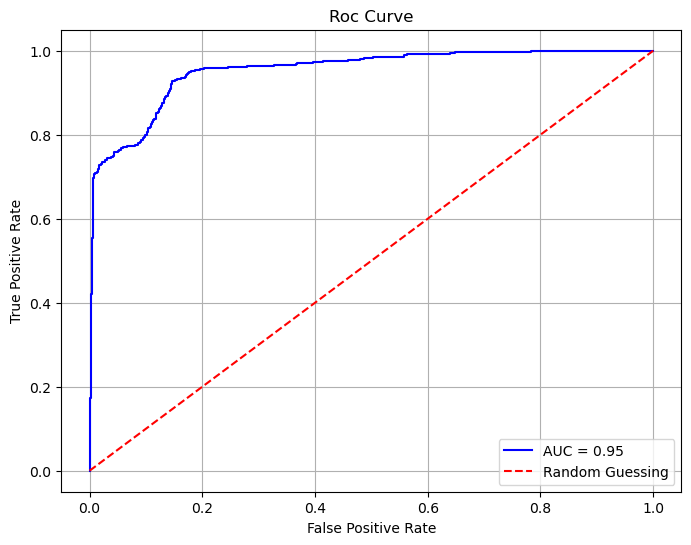

In [21]:
# preds = log_reg.predict(test_data)
# y_pred_proba = 1 / (1 + np.exp(-preds))

# fpr, tpr, _ = roc_curve(test_data['label'], y_pred_proba)

# plt.figure(figsize=(8,6))
# plt.plot(fpr, tpr, color='b', label=f'AUC = {auc:.2f}')
# plt.plot([0, 1], [0, 1], 'r--', label='Random Guessing')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Roc Curve')
# plt.legend(loc='lower right')
# plt.grid(True)
# plt.show()

### Gradient Boosted Random Forest for Fraud Prediction

In [15]:
#creating a new dataframe for the Random Forest
#sender + receiver + date + subject + body + urls
dftree = df[['label', 'sender', 'receiver', 'date', 'subject', 'body', 'urls']].copy()
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()

# Apply label encoding to each categorical column
dftree['sender'] = le.fit_transform(dftree['sender'])
dftree['receiver'] = le.fit_transform(dftree['receiver'])
dftree['date'] = le.fit_transform(dftree['date'])
dftree['subject'] = le.fit_transform(dftree['subject'])
dftree['body'] = le.fit_transform(dftree['body'])


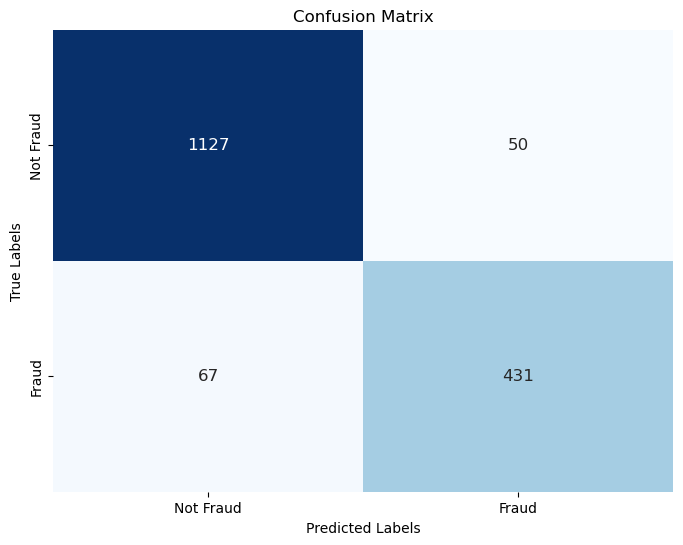

############################################################
                     Classification Report
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1177
           1       0.90      0.87      0.88       498

    accuracy                           0.93      1675
   macro avg       0.92      0.91      0.92      1675
weighted avg       0.93      0.93      0.93      1675



In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Splitting the dataset into train and test sets
X = dftree.drop(columns=['label'])  # Features
y = dftree['label']                # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize Random Forest with class weight to handle imbalanced classes
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]  # For AUC-ROC score


# Compute the confusion matrix
cm1 = confusion_matrix(y_test, y_pred)
# Define labels for the classes
labels = ["Not Fraud", "Fraud"]
plt.figure(figsize=(8,6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=labels, yticklabels=labels, annot_kws={"size": 12})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("#" * 60)
print(" " * 20, "Classification Report")
print(classification_report(y_test, y_pred))

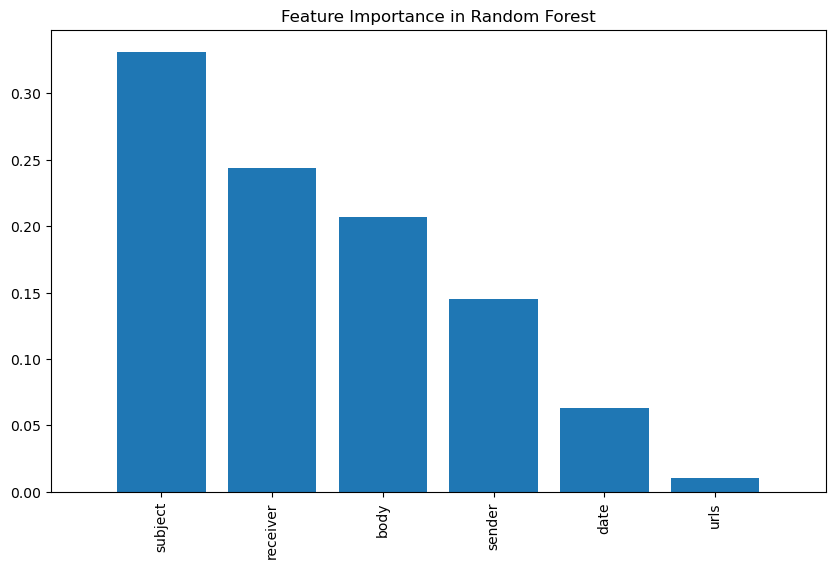

In [19]:
importances = rf.feature_importances_

indices = np.argsort(importances)[::-1]

feature_names = X_train.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance in Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), np.array(feature_names)[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [22]:
#print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


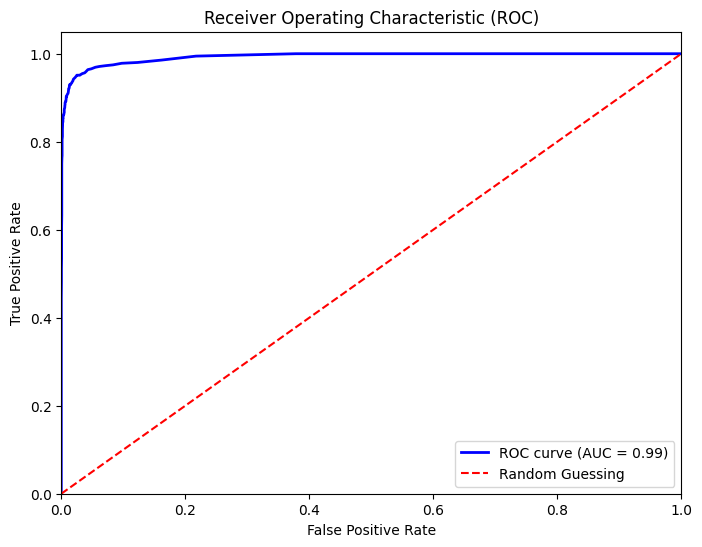

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()



In [24]:
from sklearn.model_selection import cross_val_score
# Perform 5-fold cross-validation
scores = cross_val_score(rf, X, y, cv=5, scoring='roc_auc')

# Print each fold's AUC score and the average
print("AUC scores for each fold:", scores)
print("Mean AUC score:", scores.mean())

AUC scores for each fold: [0.99326849 0.99105637 0.99604196 0.99096496 0.99016617]
Mean AUC score: 0.9922995910762678
